In [65]:
from cvxopt import matrix, solvers, spmatrix
import numpy as np
import matplotlib.pyplot as plt
from math import *

def calc_Q_p_G_h(data):
#     Q = spmatrix(2.0, range(3), range(3))
    Q = matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (3,3))
    Q[0,0] = 2
    Q[1,1] = 2
    p = matrix([0.0, 0.0, 0.0], (3,1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(1)
            G.append(row)
            h.append(-1.0)
    #print G
    G = matrix(G).trans()
    h = matrix(h)
    print(Q, p)
    print(G, h)
    print(type(G))
    return Q, p, G, h
    
    
def plot(data, w1, w2, b, sol):
    ### suppose you have obtained sol['x'] from CVXOPT QP minimization

    x = [item[0] for item in data if item[2] == 1]
    y = [item[1] for item in data if item[2] == 1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='r')
    x = [item[0] for item in data if item[2] == -1]
    y = [item[1] for item in data if item[2] == -1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='b')
    x = [item[0] for item in data]
    y = [item[1] for item in data]
    plt.scatter(x, y, s=40, facecolors='none', edgecolors='k')
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]

    print('w: {0}; b: {1} \n'.format([w1,w2], b))

    print('w.x + b > 0 for positive class')
    print('w.x + b < 0 for negative class') 

    x = [-1, 6]

    y = [(w1 * x[i] + b)/(-1 * w2) for i in range(2)]

    
    plt.plot(x, y, color='red')

    y = [(w1 * x[i] + b - 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')

    y = [(w1 * x[i] + b + 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid()

    plt.gcf().set_size_inches(5, 5)

    plt.show()

def predict_class(w1, w2, b, points):
    for point in points:
        value = w1*point[0] + w2*point[1] + b
        if value > 0:
            print(f'The point {point} belongs to class 1.')
        else:
            print(f'The point {point} belongs to class -1.')


def svm_proc(data):
    Q, p, G, h = calc_Q_p_G_h(data)
    sol=solvers.qp(Q, p, G, h)
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]
    print('\n\nw1= {0}; w2={1}; b={2}'.format(w1, w2, b))
    plot(data, w1, w2, b, sol)
    margin = 1 / np.sqrt(w1**2 + w2**2)
    print('Margin size: ', margin)

    # Identify support vectors
    support_vectors = []
    for item in data:
        if abs(w1*item[0] + w2*item[1] + b) <= 1:
            support_vectors.append(item)
    print('Support vectors: ', support_vectors)
    points = [[3, 5], [3, 4], [4, 6], [5, 4], [5, 2], [5, 6]]
    predict_class(w1, w2, b, points)

[ 2.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

[-6.00e+00 -2.00e+00 -1.00e+00]
[-6.00e+00 -4.00e+00 -1.00e+00]
[ 2.00e+00  4.00e+00  1.00e+00]
[ 3.00e+00  6.00e+00  1.00e+00]
 [-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]

<class 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0:  1.9345e-01  8.2455e-01  5e+00  1e+00  8e+00
 1:  7.8525e-01  1.5349e-01  6e-01  3e-16  1e-14
 2:  3.4766e-01  2.9190e-01  6e-02  2e-16  7e-16
 3:  3.1611e-01  3.1202e-01  4e-03  3e-16  2e-15
 4:  3.1265e-01  3.1250e-01  2e-04  2e-16  5e-14
 5:  3.1250e-01  3.1250e-01  2e-06  4e-16  1e-13
 6:  3.1250e-01  3.1250e-01  2e-08  2e-16  1e-13
Optimal solution found.


w1= 0.5000000595950866; w2=-0.2499999121362332; b=-1.000000707169104
w: [0.5000000595950866, -0.2499999121362332]; b: -1.000000707169104 

w.x + b > 0 for positive class
w.x + b < 0 for negative class


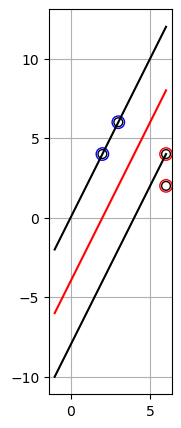

Margin size:  1.7888543371690977
Support vectors:  []
The point [3, 5] belongs to class -1.
The point [3, 4] belongs to class -1.
The point [4, 6] belongs to class -1.
The point [5, 4] belongs to class 1.
The point [5, 2] belongs to class 1.
The point [5, 6] belongs to class 1.


In [66]:
data = [[6.0, 2.0, 1], [6.0, 4.0, 1], [2.0, 4.0, -1], [3.0, 6.0, -1]]
svm_proc(data)
